## Data Overview and Cleaning

In [1]:
# import libraries
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

Preview of the dataset:

In [2]:
data = pd.read_csv("data/weather-data.csv")
data.head(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Number of records in the dataset:

In [3]:
rows, columns = data.shape

print(f"Rows: {rows}\nColumns: {columns}")

Rows: 8784
Columns: 8


Column names:

In [4]:
print(f"The dataset's columns are: \n{data.columns.tolist()}")

The dataset's columns are: 
['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']


Summary of the dataframe:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


Data types of each column:

In [6]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

Set the "Date/Time" column to a datetime object:

In [7]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"])
data.dtypes

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

Handle missing or null valuess:

In [8]:
missing_values = data.isnull().values.any()

print(f"The number of missing values is: {missing_values.sum()}")

The number of missing values is: 0


Check for duplicate records:

In [9]:
duplicates = data.duplicated()

print(f"The number of duplicates is: {duplicates.sum()}")

The number of duplicates is: 0


## Statistical Summary

Statistical summary of the data:

In [10]:
data_without_date = data.drop(columns=["Date/Time"])
statistical_summary = data_without_date.describe()

print(f"The statistical summary of the dataset looks like:")
statistical_summary.T

The statistical summary of the dataset looks like:


,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


Outlier identification:

In [11]:
def find_outliers(sr: pd.Series) -> int:
    Q1 = sr.quantile(0.25)
    Q3 = sr.quantile(0.85)
    IQR = Q3 - Q1
    outliers = sr[((sr < (Q1 - 1.5 * IQR)) | (sr > (Q3 + 1.5 * IQR)))]
    return len(outliers)

for n in (data_without_date.columns.tolist()):
    if data_without_date[n].dtype.kind in 'bifc':  # Check if column is numeric
        print(f"There are {find_outliers(data_without_date[n])} outliers in {n}.")
    else:
        print(f"Skipping column {n} because it is not numeric.")

There are 0 outliers in Temp_C.
There are 0 outliers in Dew Point Temp_C.
There are 0 outliers in Rel Hum_%.
There are 33 outliers in Wind Speed_km/h.
There are 0 outliers in Visibility_km.
There are 55 outliers in Press_kPa.
Skipping column Weather because it is not numeric.


## Data Visualization

Create a new `Month` column from the `Date/Time` column:

In [12]:
data["Month"] = data["Date/Time"].dt.month_name()
data.head(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,January
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,January
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",January
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",January
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,January


Distribution of key weather patterns:

In [13]:
def generate_lineplot(data: pd.DataFrame, x: str, y: str) -> None:
    sns.lineplot(data=data, x=x, y=y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} over the year")
    plt.xticks(rotation=90)

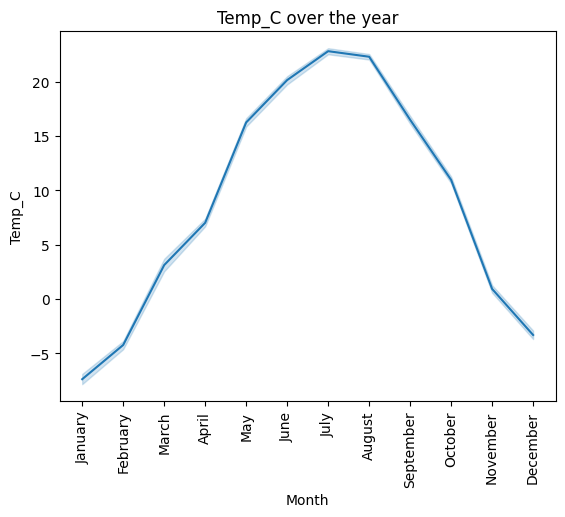

In [14]:
# Temperature over the years in the data
generate_lineplot(data=data, x="Month", y="Temp_C")

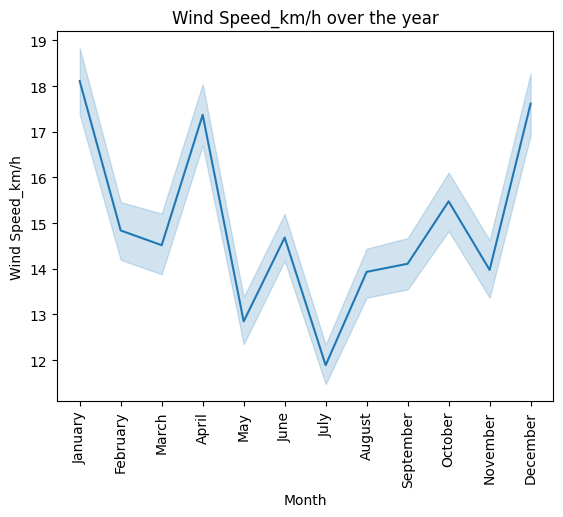

In [15]:
# Wind speed over the years in the data
generate_lineplot(data=data, x="Month", y="Wind Speed_km/h")

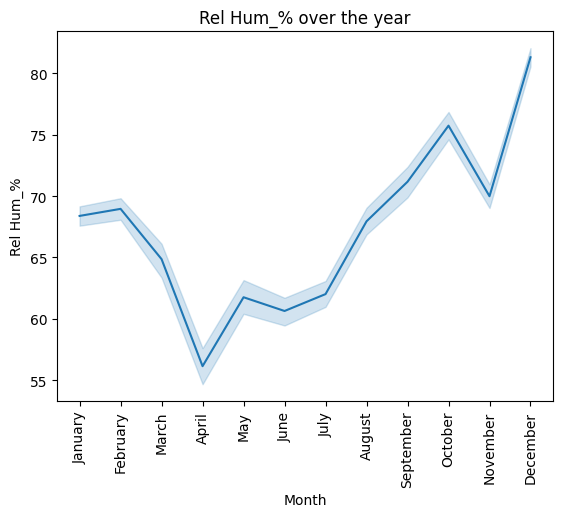

In [16]:
# Humidity over the year
generate_lineplot(data=data, x="Month", y="Rel Hum_%")

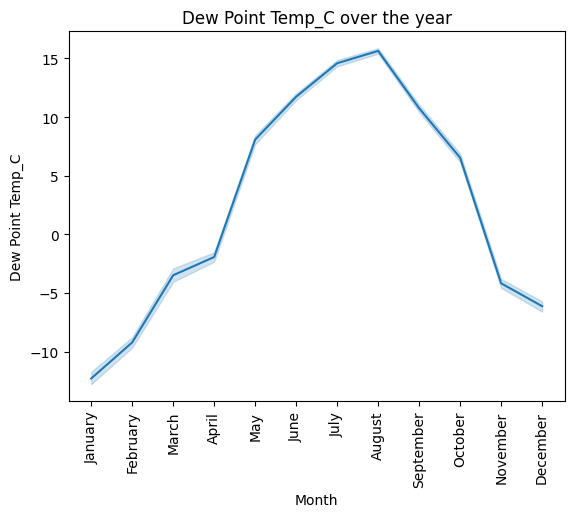

In [17]:
# Dew point temperature over the year
generate_lineplot(data=data, x="Month", y="Dew Point Temp_C")

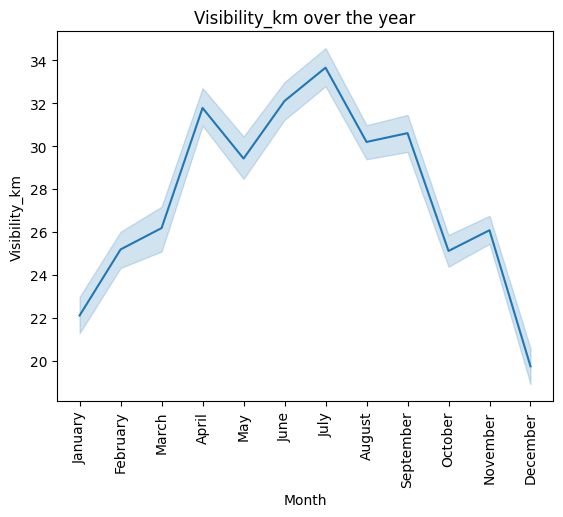

In [18]:
# Visibility over the year
generate_lineplot(data=data, x="Month", y="Visibility_km")

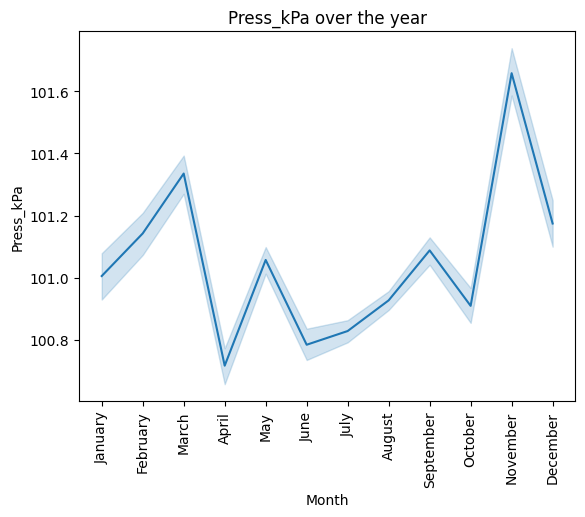

In [19]:
# Pressure over the year
generate_lineplot(data=data, x="Month", y="Press_kPa")

From the graphs we can visually determine that the temperature, visibility and dew point temperature are highly related to each other.    
We can plot these graphs together to see if there is any correlation between them.

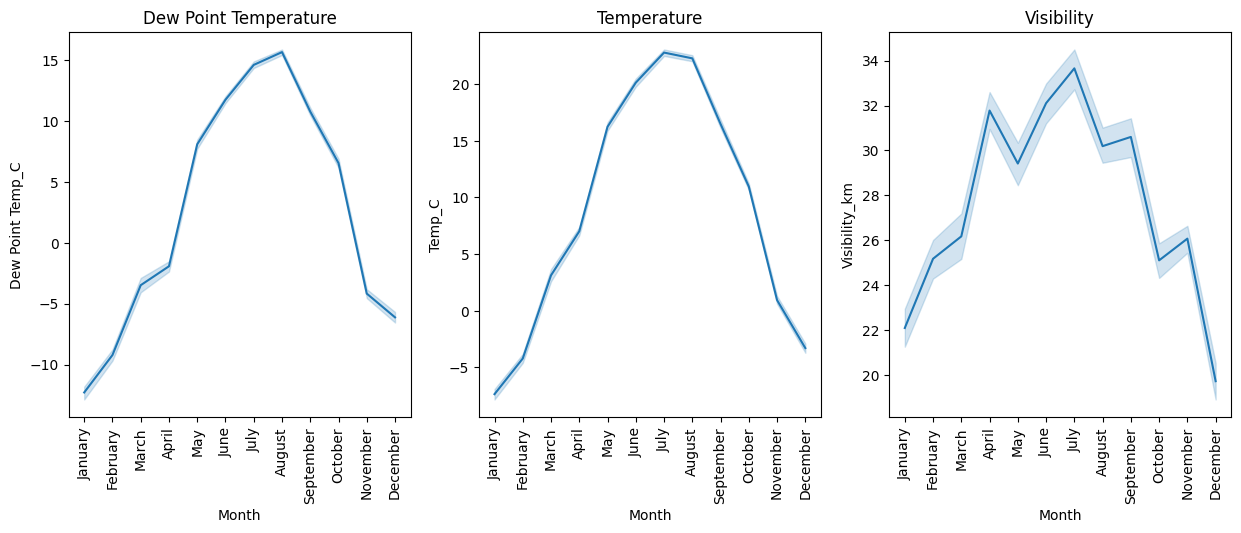

In [20]:
# Dew point temperature, temperature and visibility graphical views
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.lineplot(data=data, x="Month", y="Dew Point Temp_C", ax=ax[0])
sns.lineplot(data=data, x="Month", y="Temp_C", ax=ax[1])
sns.lineplot(data=data, x="Month", y="Visibility_km", ax=ax[2])
# Set the x tick locations and labels
months = data["Month"].unique()
for a in ax:
    a.set_xticks(range(len(months)))
    a.set_xticklabels(months, rotation=90);
# set the x tick labels
ax[0].set_xticklabels(data["Month"].unique(), rotation=90)
ax[1].set_xticklabels(data["Month"].unique(), rotation=90)
ax[2].set_xticklabels(data["Month"].unique(), rotation=90);
# set the titles
ax[0].set_title("Dew Point Temperature")
ax[1].set_title("Temperature")
ax[2].set_title("Visibility");

<Axes: xlabel='Dew Point Temp_C', ylabel='Temp_C'>

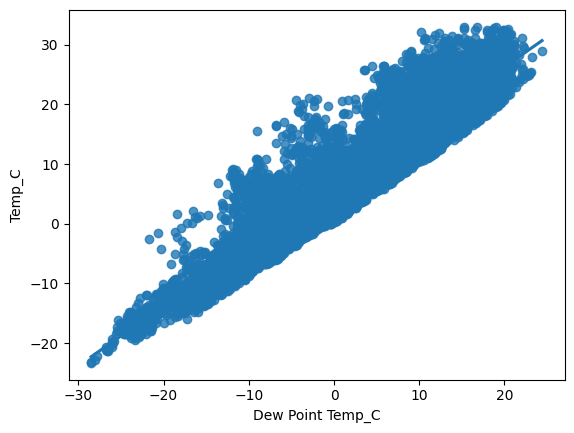

In [21]:
# Draw a regplot for dew point temperature and temperature
sns.regplot(x=data["Dew Point Temp_C"], y=data["Temp_C"])

<Axes: xlabel='Dew Point Temp_C', ylabel='Visibility_km'>

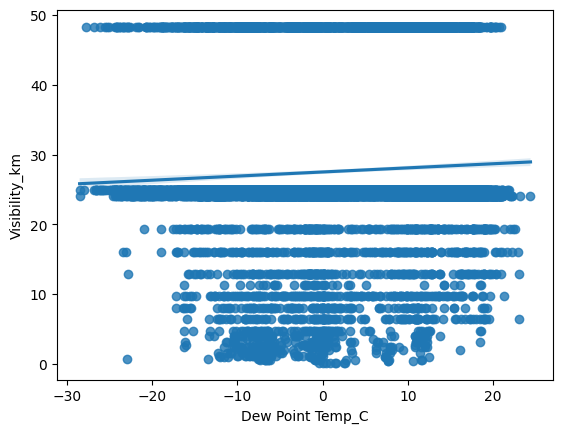

In [24]:
# Draw a regplot for dew point temperature and visibility
sns.regplot(x=data["Dew Point Temp_C"], y=data["Visibility_km"])

Correlations in the dataset:

In [22]:
data.corr(numeric_only="True")

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


Correlation heatmap:

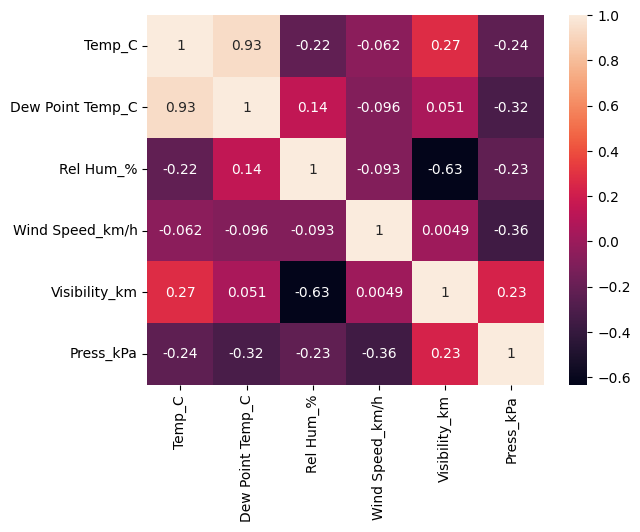

In [23]:
sns.heatmap(data.corr(numeric_only="True"), annot=True);

## Weather Patterns and Trends